# Pymaceuticals Inc.
---

### Analysis

- Add your analysis here.
 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import scipy.stats as linregress

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
combined_df = pd.merge(mouse_metadata, study_results, on="Mouse ID", how="outer")

# Display the data table for preview
combined_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [2]:
# Checking the number of mice.
count_mice = combined_df["Mouse ID"].nunique()
count_mice

249

In [3]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicate_mice = combined_df.loc[combined_df.duplicated(subset = ["Mouse ID", "Timepoint"]), "Mouse ID"].unique()
duplicate_mice

array(['g989'], dtype=object)

In [4]:
# Optional: Get all the data for the duplicate mouse ID. 
duplicate_mouse_data = combined_df.loc[combined_df["Mouse ID"]=="g989", :]
duplicate_mouse_data

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [5]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.

clean_df = combined_df[combined_df["Mouse ID"].isin(combined_df) == False]
clean_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [6]:
# Checking the number of mice in the clean DataFrame.
count_clean_mice = clean_df["Mouse ID"].nunique()
count_clean_mice

249

## Summary Statistics

In [7]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
mean_tumor_vol = combined_df.groupby("Drug Regimen").mean(numeric_only=True)["Tumor Volume (mm3)"]
median_tumor_vol = combined_df.groupby("Drug Regimen").median(numeric_only=True)["Tumor Volume (mm3)"]
variance_tumor_vol = combined_df.groupby("Drug Regimen").var(numeric_only=True)["Tumor Volume (mm3)"]
std_tumor_vol = combined_df.groupby("Drug Regimen").std(numeric_only=True)["Tumor Volume (mm3)"]
sem_tumor_vol = combined_df.groupby("Drug Regimen").sem(numeric_only=True)["Tumor Volume (mm3)"]

# Assemble the resulting series into a single summary DataFrame.
stat_summary_df = pd.DataFrame({"Mean Tumor Volume": mean_tumor_vol, "Median Tumor Volume": median_tumor_vol,
                               "Tumor Volume Variance": variance_tumor_vol, "Tumor Volume Std. Dev.": std_tumor_vol,
                               "Tumor Volume Std. Err.": sem_tumor_vol})
stat_summary_df


,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.322552,50.854632,42.351070,6.507770,0.512884
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [8]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)
# Using the aggregation method, produce the same summary statistics in a single line
stat_summary_df2 = combined_df.groupby(["Drug Regimen"])["Tumor Volume (mm3)"].agg(["mean", "median", "var", "std", "sem"])

stat_summary_df2

,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.322552,50.854632,42.351070,6.507770,0.512884
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

Text(0, 0.5, '# of Observed Mouse Timepoints')

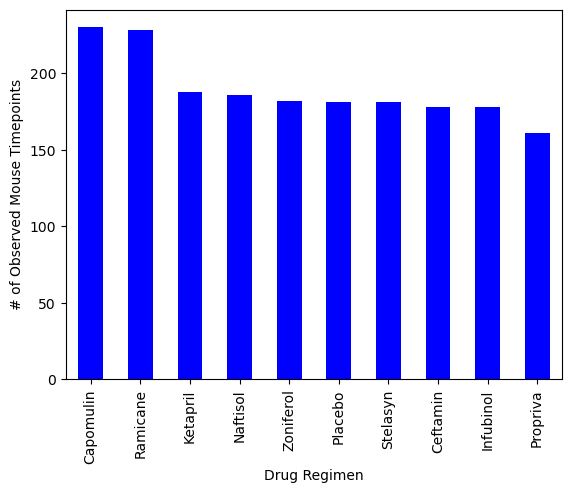

In [9]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.
pandas_barchart = clean_df.groupby(["Drug Regimen"])["Timepoint"].count()
pandas_barchart.sort_values(ascending=False).plot(kind = "bar", color = "blue")
plt.xlabel("Drug Regimen")
plt.ylabel("# of Observed Mouse Timepoints")

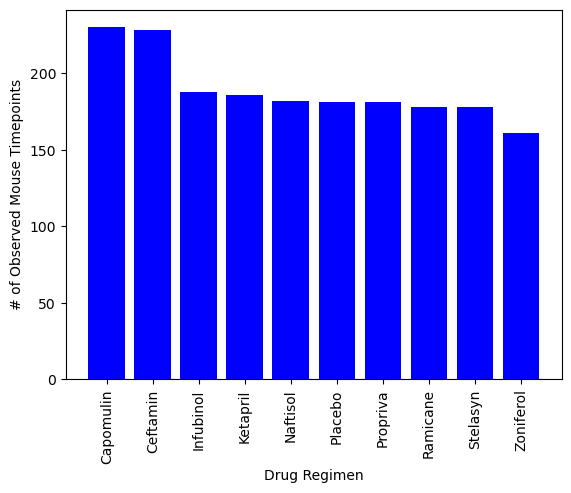

In [10]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.
x_axis = clean_df.groupby(["Drug Regimen"])["Timepoint"].count()
y_axis = pandas_barchart.sort_values(ascending=False)
plt.bar(x_axis.index, y_axis, color = "blue")
plt.xlabel("Drug Regimen")
plt.ylabel("# of Observed Mouse Timepoints")
plt.xticks(rotation = "vertical")
plt.show()

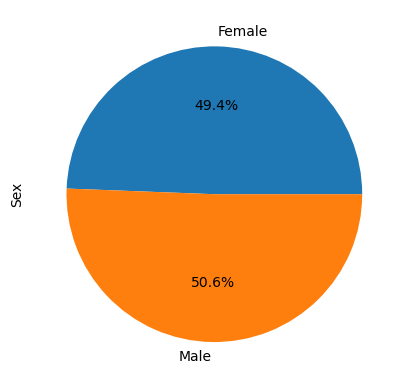

In [11]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
f_vs_m = clean_df.groupby(["Sex"])["Sex"].count()
f_vs_m.plot(kind = "pie", autopct="%1.1f%%", subplots = True)
plt.show()

([<matplotlib.patches.Wedge at 0x1cedf5bfa60>,
 [Text(0.02099250347258556, 1.0997996703027118, 'Female'),
  Text(-0.020992503472586185, -1.0997996703027118, 'Male')],
 [Text(0.011450456439592123, 0.5998907292560246, '49.4%'),
  Text(-0.011450456439592464, -0.5998907292560246, '50.6%')])

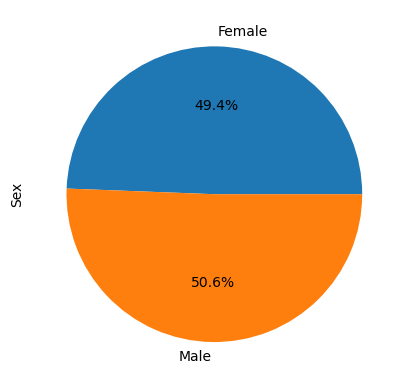

In [12]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
fvm = clean_df.groupby(["Sex"])["Sex"].count()
labels = ["Female", "Male"]
plt.ylabel("Sex")
plt.pie(fvm, autopct="%1.1f%%", labels = labels)

## Quartiles, Outliers and Boxplots

In [13]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
# Start by getting the last (greatest) timepoint for each mouse
great_timepoint = clean_df.groupby(["Mouse ID"])["Timepoint"].max()
great_timepoint2 = pd.DataFrame(great_timepoint)

# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
merge_great_timepoint = great_timepoint2.merge(combined_df, on = ("Mouse ID","Timepoint"), how="left")

In [14]:
# Put treatments into a list for for loop (and later for plot labels)
treatments = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]

# Create empty list to fill with tumor vol data (for plotting)
tumor_vol_data = []
#print(merge_great_timepoint)
#result = merge_great_timepoint.loc[0, 'Drug Regimen']
#print(result)

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
for treatment in treatments:   
    # Locate the rows which contain mice on each drug and get the tumor volumes         
    data = merge_great_timepoint.loc[merge_great_timepoint['Drug Regimen'] == treatment, ['Tumor Volume (mm3)']]
    # add subset 
    
    tumor_vol_data.append(data)
    
    #Determine outliers using upper and lower bounds
    quartiles = merge_great_timepoint["Tumor Volume (mm3)"].quantile([.25, .5, .75])
    lowerq = quartiles[.25]
    upperq = quartiles[.75]
    iqr = upperq - lowerq
    
    lower_bound = lowerq - (1.5 * iqr)
    upper_bound = upperq + (1.5 * iqr)
    #print(data)
    lower_data = data.loc[data['Tumor Volume (mm3)'] > lower_bound, ['Tumor Volume (mm3)']]
    upper_data = data.loc[data['Tumor Volume (mm3)'] < upper_bound, ['Tumor Volume (mm3)']]
  
    print(f"{treatment}'s potential outliers: \n{lower_data}\n{upper_data}'")
    

Capomulin's potential outliers: 
     Tumor Volume (mm3)
19            38.982878
24            38.939633
61            30.485985
64            37.074024
66            40.159220
81            47.685963
84            37.311846
86            38.125164
88            38.753265
109           41.483008
116           38.846876
122           28.430964
125           33.329098
163           46.539206
164           32.377357
170           41.581521
175           23.343598
181           40.728578
184           34.455298
193           31.023923
205           40.658124
209           39.952347
221           36.041047
227           28.484033
240           31.896238
     Tumor Volume (mm3)
19            38.982878
24            38.939633
61            30.485985
64            37.074024
66            40.159220
81            47.685963
84            37.311846
86            38.125164
88            38.753265
109           41.483008
116           38.846876
122           28.430964
125           33.329098
163    

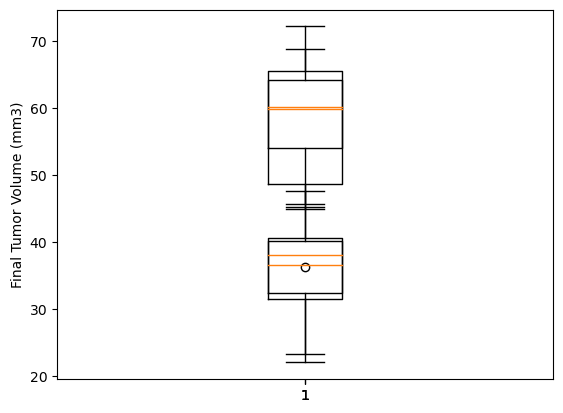

In [15]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.
fig1, ax1 = plt.subplots()
ax1.set_ylabel("Final Tumor Volume (mm3)")
for data in tumor_vol_data :
    ax1.boxplot(data)
    #plt.xticks()
plt.show()


## Line and Scatter Plots

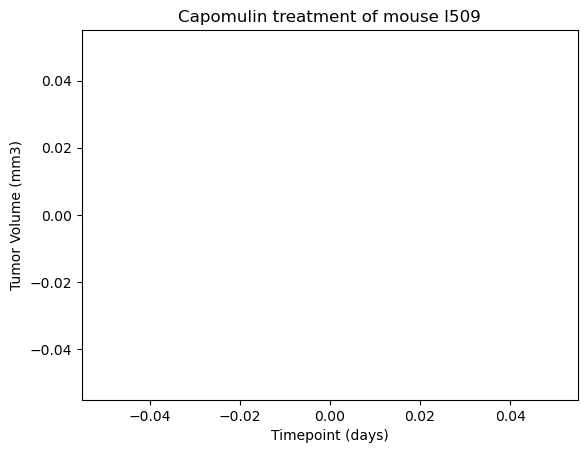

In [16]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin
mouseI509_df = clean_df.loc[clean_df["Mouse ID"] == "I509",:]
plt1 = mouseI509_df["Timepoint"]
tumor_vol = mouseI509_df["Tumor Volume (mm3)"]
plt.title("Capomulin treatment of mouse I509")
plt.plot(plt1, tumor_vol, color="blue")
plt.xlabel("Timepoint (days)")
plt.ylabel("Tumor Volume (mm3)")
plt.show()

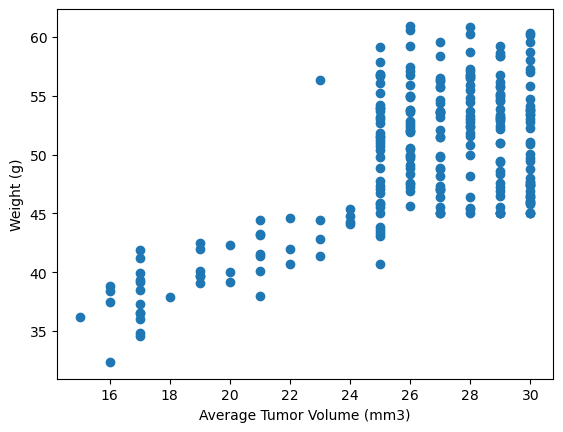

In [17]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen
avg_tumor_vol_df = clean_df.groupby(["Mouse ID"]).mean(numeric_only=True)
plt.scatter(avg_tumor_vol_df["Weight (g)"], avg_tumor_vol_df["Tumor Volume (mm3)"])
plt.xlabel("Average Tumor Volume (mm3)")
plt.ylabel("Weight (g)")
plt.show()

## Correlation and Regression

TypeError: 'module' object is not callable

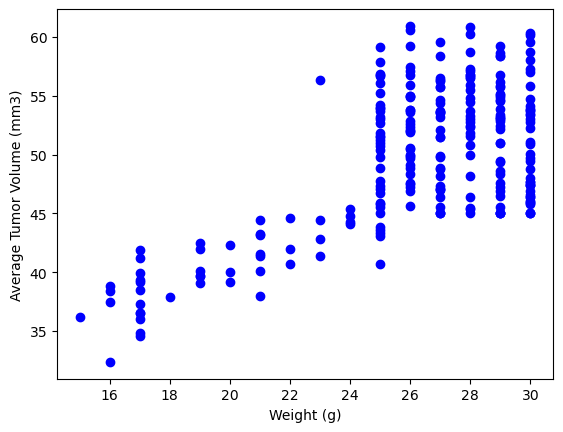

In [24]:
# Calculate the correlation coefficient and a linear regression model 
# for mouse weight and average observed tumor volume for the entire Capomulin regimen
corr = round(linregress.pearsonr(avg_tumor_vol_df["Weight (g)"], avg_tumor_vol_df["Tumor Volume (mm3)"])[0],2)
plt.scatter(avg_tumor_vol_df["Weight (g)"], avg_tumor_vol_df["Tumor Volume (mm3)"], color="blue")
plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")
x_val = avg_tumor_vol_df["Weight (g)"]
y_val = avg_tumor_vol_df["Tumor Volume (mm3)"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_val, y_val)
line1 = x_val * slope + intercept
line2 = "y = " +str(round(slop,2)) + "x + " + str(round(intercept,2))
plt.plot(x_val, line2, "r-")


plt.show()